In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


###  Question1: 

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
# data max and min temperatures

Max =np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
dataframe=pd.DataFrame({'month_num':[1,2,3,4,5,6,7,8,9,10,11,12],'max_temp':Max,'min_temp':Min})

In [4]:
dataframe

,month_num,max_temp,min_temp
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


#### simple plot with matplotlib

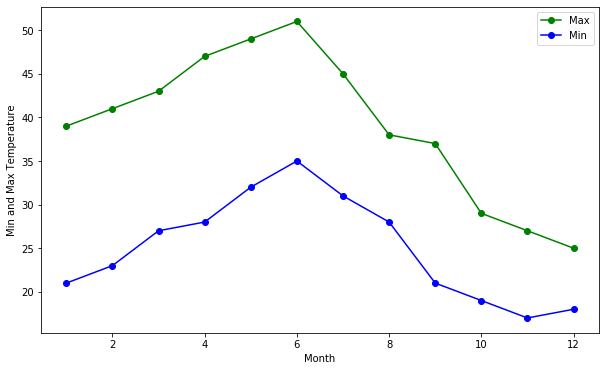

In [5]:

plt.figure(figsize=(10,6))
plt.plot(dataframe.month_num,dataframe.max_temp,'go-')
plt.plot(dataframe.month_num,dataframe.min_temp,'bo-')
plt.xlabel("Month")
plt.ylabel("Min and Max Temperature")
plt.legend(['Max','Min'])
plt.show()

### Using Scipy.optimize.curve_fit for fitting a periodic function based on Max and Min temperatures for 12 months of the year 

In [6]:
from scipy import optimize

# defining curve fitting
def yearly_temperatures(times,avg,ampl,time_offset):
    return  (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))


res_max, cov_max = optimize.curve_fit(yearly_temperatures, dataframe.month_num,
                                      dataframe.max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temperatures, dataframe.month_num,
                                      dataframe.min_temp, [-40, 20, 0])

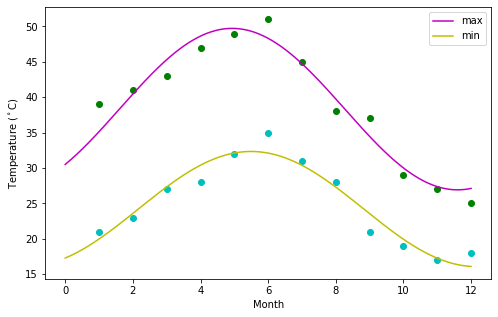

In [13]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,5))
plt.plot(dataframe.month_num, dataframe.max_temp, 'go')
plt.plot(days, yearly_temperatures(days, *res_max), 'm-',label='max')
plt.plot(dataframe.month_num, dataframe.min_temp, 'co')
plt.plot(days, yearly_temperatures(days, *res_min), 'y-',label='min')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()

plt.show()

### Question2:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)


Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [ ]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)

In [ ]:
titanic.head(10)

In [ ]:
sex_counts=titanic.sex.value_counts()
print(sex_counts)

### plot of pie chart presenting the male/female proportion

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sex_counts,labels=sex_counts.index,autopct='%1.2f%%')
plt.show()

###  scatterplot with the Fare paid and the Age, differ the plot color by gender

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x='age',y='fare',hue='sex',alpha=1.0,data=titanic)
plt.xlabel('Age')
plt.ylabel('Fare Price')
plt.show()